# Download the data

In [102]:
import os
import tarfile
from six.moves import urllib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [104]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [105]:
fetch_housing_data()

In [106]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Take a Quick Look at the Data Structure

- Head
- Info
- Describe
- Histogram on numerical features

In [157]:
# Your code
df = load_housing_data()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [109]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ce961d0>]],
      dtype=object)

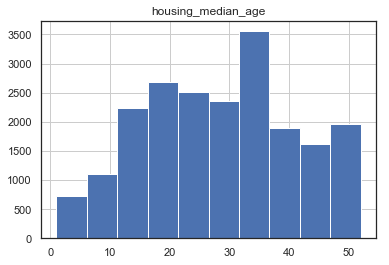

In [110]:
df.hist(column='housing_median_age')

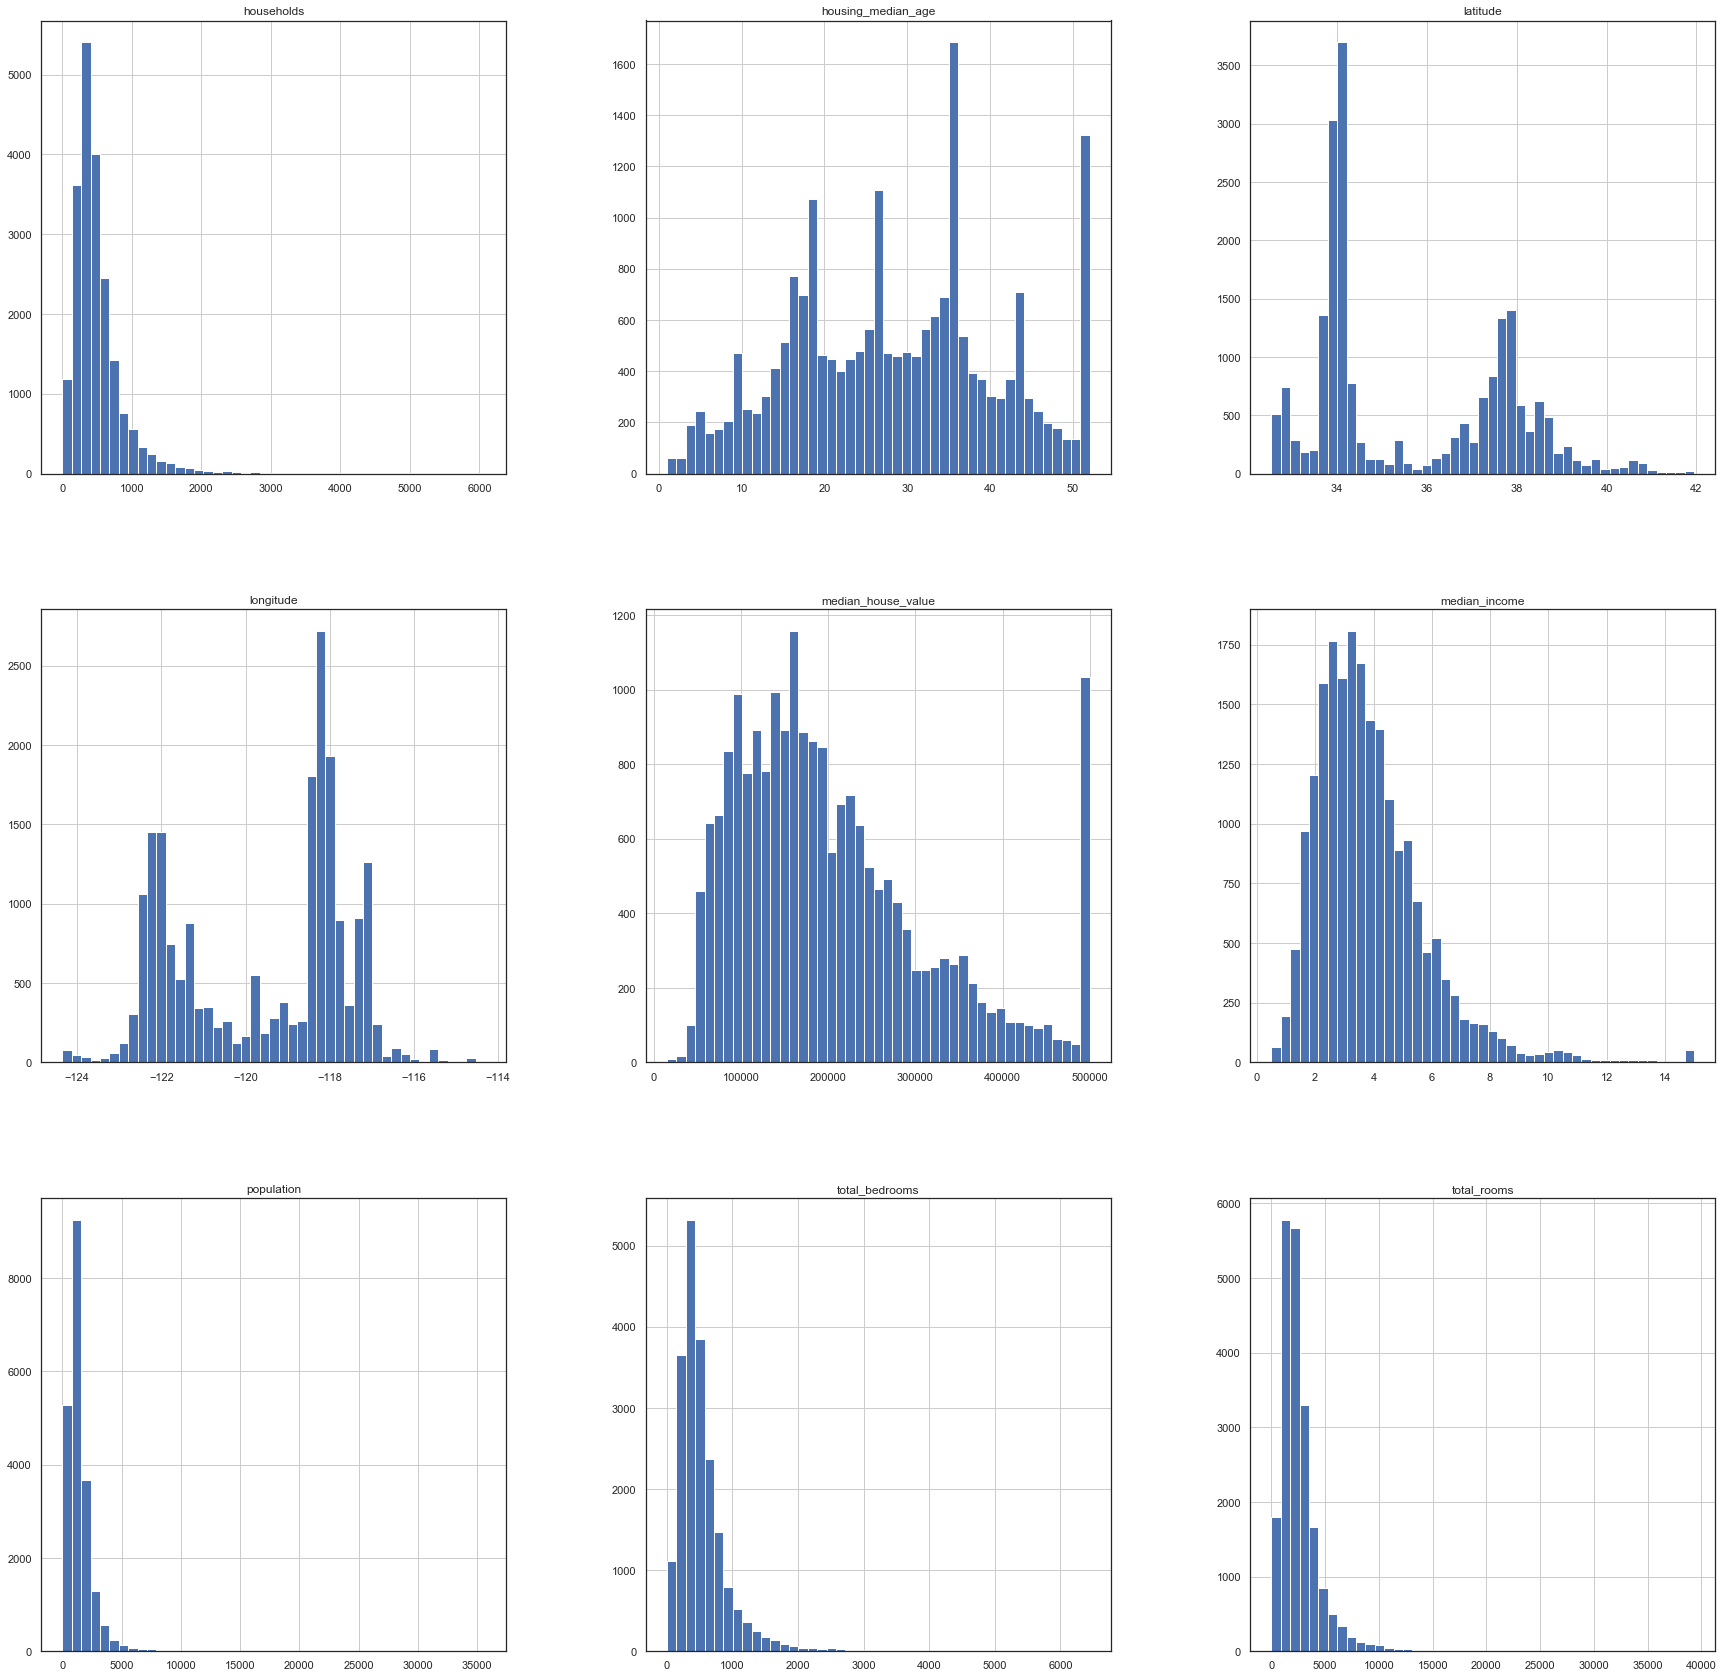

In [111]:
hist = df.hist(bins=45, figsize=(30,30))

# Create a Test Set

It may sound strange to voluntarily set aside part of the data at this stage. After all, you have only taken a quick glance at the data, and surely you should learn a whole lot more about it before you decide what algorithms to use, right? This is true, but your brain is an amazing pattern detection system, which means that it is highly prone to overfitting: if you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model. When you estimate the generalization error using the test set, your estimate will be too optimistic and you will launch a system that will not perform as well as expected. This is called data snooping bias.

In [134]:
# Your code
X = df[["housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]]
y = df[['median_house_value']]


from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

train_set, test_set = train_test_split(df, test_size=0.2)

In [135]:
train_set.shape

(16512, 12)

# Discover and Visualize the Data to Gain Insights

## Visualizing Geographical Data

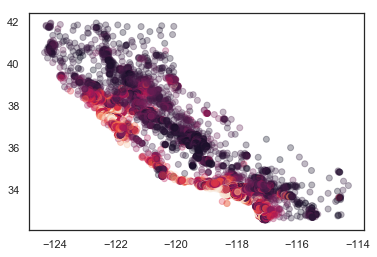

In [112]:
# Your code
plt.scatter(x=df['longitude'], y=df['latitude'], c=df["median_house_value"], alpha=0.3)

plt.show() #alpha opacité # code couleur prix #carte

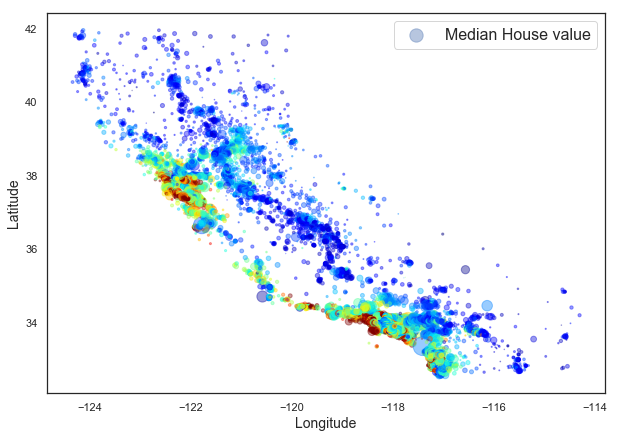

In [137]:
ax = df.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=df['population']/100, label="Median House value",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
#plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.legend(fontsize=16)
plt.show()

## Looking for Correlations

In [144]:
# Your code
corr = df.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,percentage_room_households,rentability
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.470502,-0.027540,0.011541
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.402228,0.106389,0.170047
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.180438,-0.153277,-0.224386
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.019000,0.133798,0.009170
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.022258,0.001538,-0.085600
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.082343,-0.072213,-0.009073
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.024473,-0.080598,-0.089000
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.017917,0.326895,0.090281
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.058077,0.151948,-0.518606
ocean_proximity,-0.470502,0.402228,0.180438,-0.019000,-0.022258,-0.082343,-0.024473,-0.017917,0.058077,1.000000,0.008023,-0.040774


In [145]:
corr['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
percentage_room_households    0.151948
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
ocean_proximity               0.058077
total_bedrooms                0.049686
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
rentability                  -0.518606
Name: median_house_value, dtype: float64

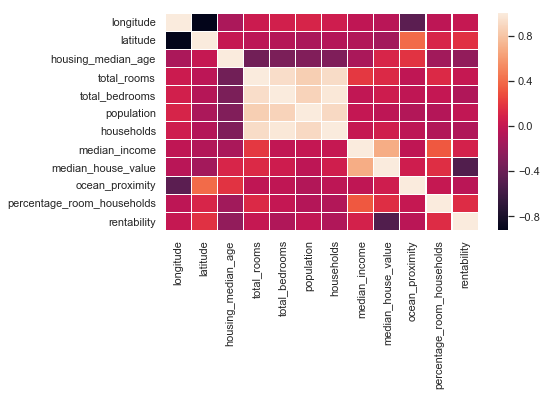

In [141]:
f, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(corr,linewidths=.1)

## Experimenting with Feature Engineering

Try to think of new features more useful than some that already exist. For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. 

In [151]:
# Your code
df["a"] = df['total_rooms'] / df['households']

df['b'] = df['total_bedrooms'] / df['total_rooms']

df['c'] = df['population'] / df['households']
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,percentage_room_households,rentability,b,c,a
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4,6.984127,0.022073,0.146591,2.555556,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4,6.238137,0.027787,0.155797,2.109842,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4,8.288136,0.024734,0.129516,2.802260,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4,5.817352,0.019841,0.184458,2.547945,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4,6.281853,0.013488,0.172096,2.181467,6.281853


In [152]:
corr = df.corr()

corr['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
a                             0.151948
percentage_room_households    0.151948
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
ocean_proximity               0.058077
total_bedrooms                0.049686
c                            -0.023737
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
b                            -0.255880
rentability                  -0.518606
Name: median_house_value, dtype: float64

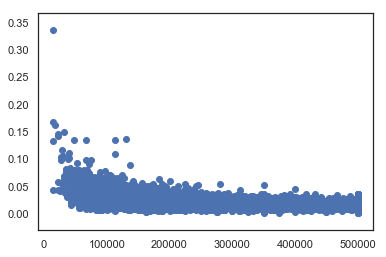

In [146]:
# Check the correlation with the new features


x = df['median_house_value']
y = df['percentage_room_households']
z = df['rentability']

plt.scatter(x, z)


# Data Preparation

## Variable Encoding

In [117]:
#Your code
df.dtypes

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity                object
percentage_room_households    float64
rentability                   float64
dtype: object

In [156]:
df.ocean_proximity.value_counts()

0    9136
1    6551
2    2658
4    2290
6       5
Name: ocean_proximity, dtype: int64

In [119]:
cleanup_nums = {"ocean_proximity":{"<1H OCEAN":0,"INLAND": 1, "NEAR OCEAN": 2, "NEAR BAY": 4, "ISLAND": 6}}

In [120]:
df1 = df
df1.replace(cleanup_nums, inplace=True)
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,percentage_room_households,rentability
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4,6.984127,0.022073
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4,6.238137,0.027787
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4,8.288136,0.024734
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4,5.817352,0.019841
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4,6.281853,0.013488


In [158]:
#Methode plus simple:
df1 = pd.get_dummies(df1)
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,percentage_room_households,rentability,b,c,a
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4,6.984127,0.022073,0.146591,2.555556,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4,6.238137,0.027787,0.155797,2.109842,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4,8.288136,0.024734,0.129516,2.802260,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4,5.817352,0.019841,0.184458,2.547945,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4,6.281853,0.013488,0.172096,2.181467,6.281853


In [121]:
df.housing_median_age.unique()

array([41., 21., 52., 42., 50., 40., 49., 48., 51., 43.,  2., 46., 26.,
       20., 17., 36., 19., 23., 38., 35., 10., 16., 27., 39., 31., 29.,
       22., 37., 28., 34., 32., 47., 44., 30., 18., 45., 33., 24., 15.,
       14., 13., 25.,  5., 12.,  6.,  8.,  9.,  7.,  3.,  4., 11.,  1.])

In [122]:
print( df.housing_median_age.min() ,'>', df.housing_median_age.max())

1.0 > 52.0


## Data Cleaning (missing values handling)

In [123]:
# Check a class called Imputer in Scikit Learn with parameter "median"
from sklearn.impute import SimpleImputer


In [124]:
null_cols = df1.isnull().sum()
null_cols[null_cols > 0]

total_bedrooms    207
dtype: int64

In [162]:
# Your code
imp = SimpleImputer(missing_values=np.nan, strategy='median', verbose=10)
imp.fit([df1['total_bedrooms']])

imp.transform([df1['total_bedrooms']])

#housing_df = pd.DataFrame(imp.transform([df1['total_bedrooms']]), columns= housing.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/impute.py:385: UserWarning: Deleting features without observed values: [  290   341   538   563   696   738  1097  1350  1456  1493  1606  2028
  2115  2301  2323  2334  2351  2412  2420  2578  2608  2647  2826  3024
  3328  3354  3376  3482  3485  3529  3721  3778  3912  3921  3958  4043
  4046  4186  4279  4309  4391  4447  4496  4591  4600  4629  4667  4691
  4738  4743  4744  4767  4852  5059  5216  5222  5236  5654  5665  5678
  5723  5751  5990  6052  6068  6220  6241  6253  6298  6421  6541  6590
  6814  6835  6962  7097  7113  7168  7191  7228  7316  7330  7547  7654
  7668  7763  7806  8337  8383  8530  8915  9149  9571  9620  9622  9814
  9845  9877  9942  9970 10033 10216 10236 10385 10389 10428 10495 10761
 10885 10915 11096 11311 11351 11441 11449 11512 11741 12101 12414 12570
 12809 13015 13069 13311 13332 13336 13597 13656 13706 13925 13932 13933
 14015 14152 14173 14307 14331 14386 14462 14521 14641 14930 14970 14986
 15030

array([[ 129., 1106.,  190., ...,  485.,  409.,  616.]])

## Feature engineering

In [126]:
# Add the features that you discovered before
#Re-write new feature



In [127]:
# Your code

## Feature Scaling

In [128]:
# Check StandardScaler in Scikit Learn
from sklearn.preprocessing import StandardScaler

In [130]:
# your code
scaler = StandardScaler()
housing_df = pd.DataFrame(scaler.fit_transform(housing), columns=housing.columns)


StandardScaler(copy=True, with_mean=True, with_std=True)
[-1.19569704e+02  3.56318614e+01  2.86394864e+01  2.63576308e+03
  5.37870553e+02  1.42547674e+03  4.99539680e+02  3.87067100e+00
  2.06855817e+05  1.02020349e+00  5.42899974e+00  2.56609691e-02]


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [ ]:
housing_df

# Select and Train a Model

## Training and Evaluating on the Training Set

Try :
- Linear Regression
- Decision Tree Regression
- Random Forest Regression
(check Scikit Learn)


With Performance Metric = RMSE

In [ ]:
y_train = housing['median_house_value']

x_train = housing_df.drop(columns=['median_house_value'])

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegressionrRegression()
lin_reg.fit(X_train, y_train)

In [ ]:
y_train_prep = lin_reg.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train, y_train_prep))

#67884 $  d'erreur en moyenne

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

y_train_pred = tree_reg.predict(X_train)

tree_rmse = np.sqrt(mean_squared_error(y_train, y_train_prep))
tree_rmse

#0 il ne se trompe jamais


## Model Evaluation Using Cross-Validation

Check from sklearn.model_selection import cross_val_score

In [163]:
from sklearn.model_selection import cross_val_score
tree_reg = DecisionTreeRegressor()
scores = cross_val_score(tree_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

scores




NameError: name 'housing' is not defined

In [ ]:
np.sqrt(-scores).mean()